In [1]:
from exp.utils import *
from exp.models import *
from exp.losses import *
from fastai.vision.all import *

In [7]:
p_data = get_data_path()
p_images = get_image_path()
p_data, p_images

(Path('/home/favi/.datasets/CRX8'), Path('/home/favi/.datasets/CRX8/images'))

In [12]:
data_block = DataBlock()

In [13]:
p_images_ls = p_images.ls()[:100]

In [14]:
ds = data_block.datasets(p_images_ls)

In [15]:
ds.

(Path('/home/favi/.datasets/CRX8/images/00007745_008.png'),
 Path('/home/favi/.datasets/CRX8/images/00007745_008.png'))

In [17]:
data_block = DataBlock(get_items=get_image_files)
ds = data_block.datasets(p_images)
ds.train[0]

(Path('/home/favi/.datasets/CRX8/images/00019919_009.png'),
 Path('/home/favi/.datasets/CRX8/images/00019919_009.png'))

In [30]:
# Load data
label = "Cardiomegaly"
train_df, valid_df, test_df = get_dataframes(include_labels=get_labels(), 
                                             small=False)
print(train_df.shape, valid_df.shape, test_df.shape)
train_df = get_binary_df(label, train_df)
valid_df = get_binary_df(label, valid_df)
test_df  = get_binary_df(label, test_df)

complete_df = pd.concat([train_df, valid_df, test_df])
complete_df = complete_df.drop(columns=["Follow-up #", "Patient ID", "Patient Age", "Patient Gender", 
                   "View Position", "OriginalImage[Width", "Height]", 
                   "OriginalImagePixelSpacing[x", "y]", "No Finding"])

(69219, 25) (17305, 25) (25596, 24)


In [69]:
def label_func(fname):
    lbl = complete_df[complete_df["Image Index"] == fname.name]["Cardiomegaly"].values[0]
    return "Cardiomegaly" if lbl > 0 else "No Cardiomegaly"

In [71]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func,
                   splitter  = RandomSplitter(),
                   item_tfms = Resize(224))

dsets = dblock.datasets(p_images)

In [87]:
dsets.vocab

['Cardiomegaly', 'No Cardiomegaly']

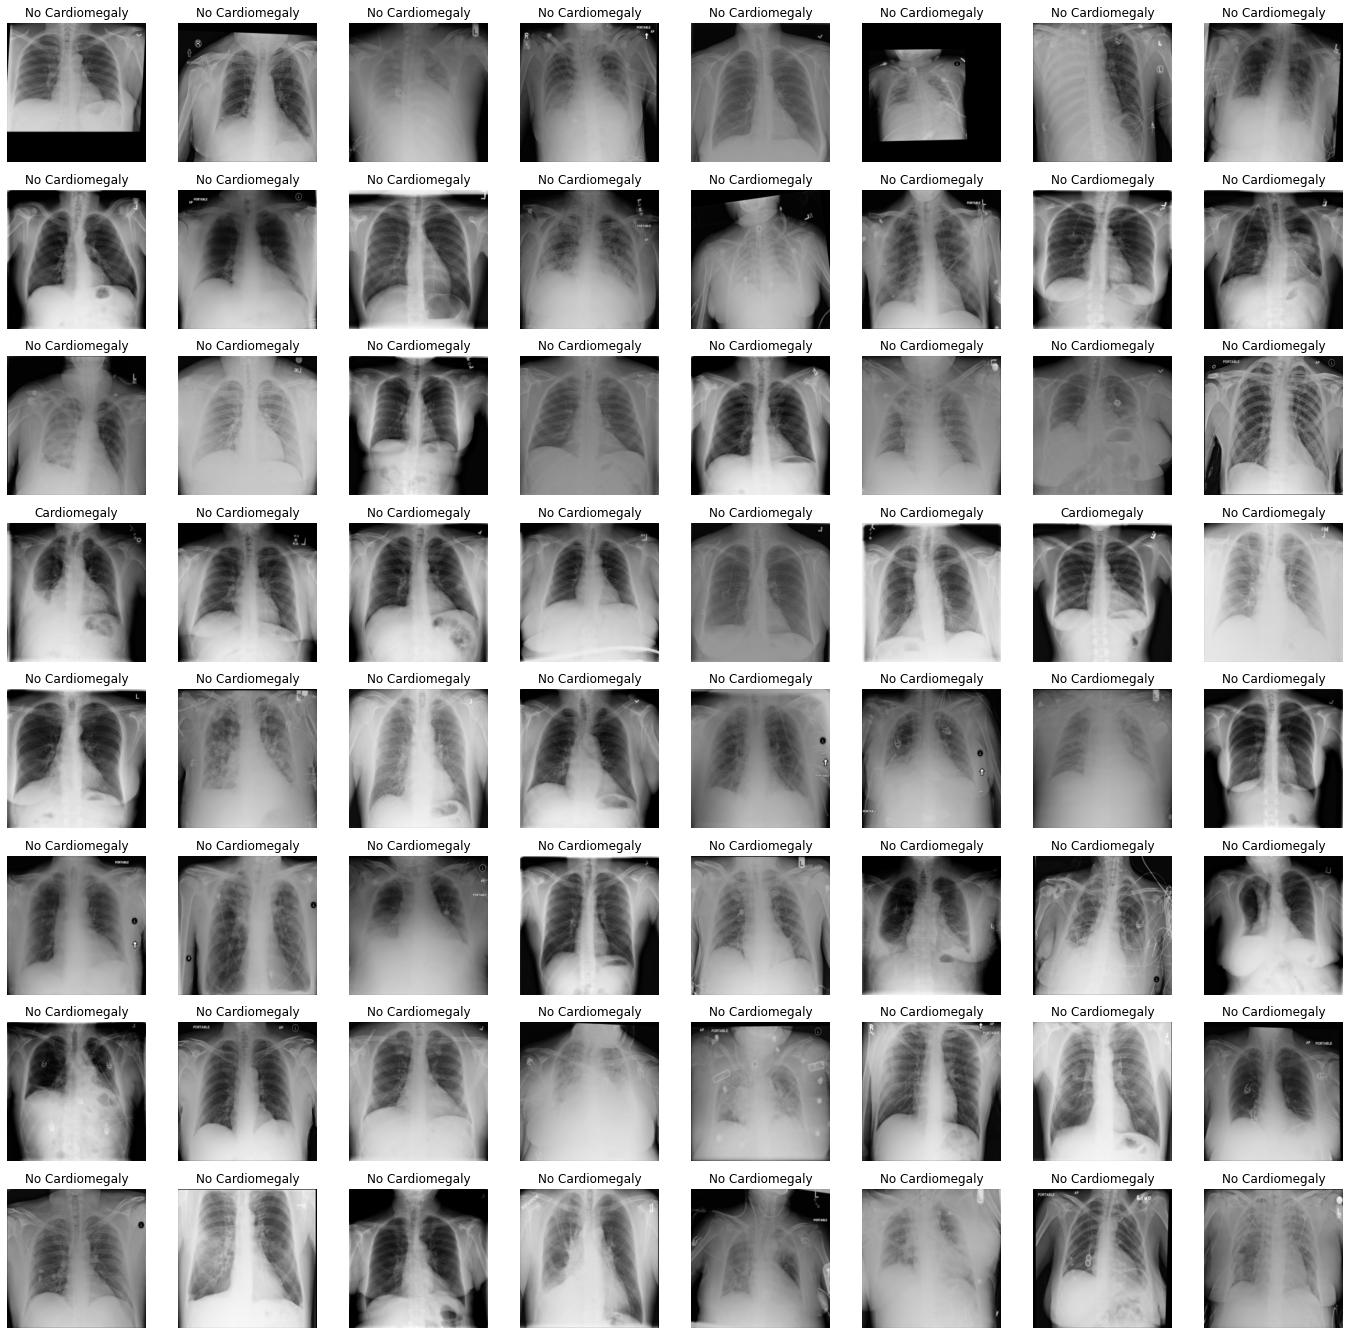

In [93]:
dls = dblock.dataloaders(p_images)
dls.show_batch(max_n=100)

In [94]:
learn = cnn_learner(dls, resnet18, metrics=[accuracy, RocAucBinary()])
learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.127480,0.118424,0.974269,0.706279,03:55


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.082554,0.086245,0.975339,0.881241,03:59
1,0.071265,0.079247,0.975339,0.913304,04:00


In [40]:
complete_df = pd.concat([train_df, valid_df, test_df])
complete_df = complete_df.drop(columns=["Follow-up #", "Patient ID", "Patient Age", "Patient Gender", 
                   "View Position", "OriginalImage[Width", "Height]", 
                   "OriginalImagePixelSpacing[x", "y]", "No Finding"])

In [41]:
complete_df

,Image Index,Cardiomegaly
82650,00020326_000.png,0.0
82651,00020326_001.png,0.0
82652,00020326_002.png,0.0
82653,00020326_004.png,0.0
82654,00020326_003.png,0.0
...,...,...
112113,00030800_000.png,0.0
112116,00030802_000.png,0.0
112117,00030803_000.png,0.0
112118,00030804_000.png,0.0


In [31]:
train_val_df = (pd.concat([train_df, valid_df])
    .drop(columns=["Follow-up #", "Patient ID", "Patient Age", "Patient Gender", 
                   "View Position", "OriginalImage[Width", "Height]", 
                   "OriginalImagePixelSpacing[x", "y]"]))

In [34]:
train_val_df

,Image Index,No Finding,Cardiomegaly
82650,00020326_000.png,0.0,0.0
82651,00020326_001.png,0.0,0.0
82652,00020326_002.png,0.0,0.0
82653,00020326_004.png,0.0,0.0
82654,00020326_003.png,0.0,0.0
...,...,...,...
111981,00030708_000.png,0.0,1.0
112006,00030727_000.png,0.0,0.0
112038,00030751_000.png,0.0,0.0
112058,00030759_000.png,0.0,0.0


In [43]:
complete_df[complete_df["Image Index"] == "00019919_009.png"]

,Image Index,Cardiomegaly
81084,00019919_009.png,0.0


In [ ]:
lungs = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms = Resize(256)
)

In [2]:
path = untar_data(URLs.IMAGENETTE_160)

A new version of this dataset is available, downloading...


File downloaded is broken. Remove /home/favi/.fastai/archive/imagenette2-160.tgz and try again.


In [3]:
dls = ImageDataLoaders.from_folder(path, valid='val', 
    item_tfms=RandomResizedCrop(128, min_scale=0.35), batch_tfms=Normalize.from_stats(*imagenet_stats))

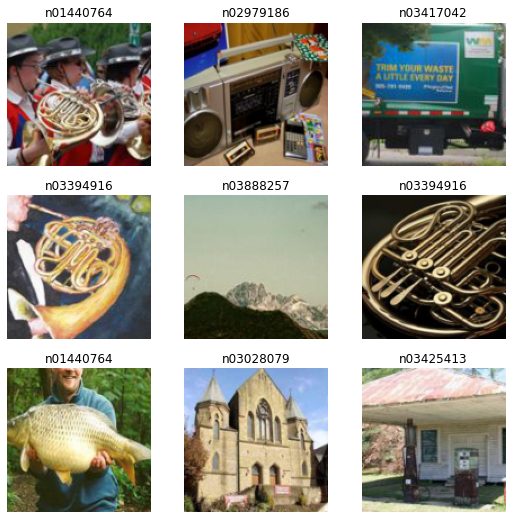

In [4]:
dls.show_batch()

In [5]:
fnames = get_image_files(path)

In [6]:
dblock = DataBlock()

In [7]:
dsets = dblock.datasets(fnames)
dsets.train[0]

(Path('/home/favi/.fastai/data/imagenette2-160/train/n03000684/n03000684_31936.JPEG'),
 Path('/home/favi/.fastai/data/imagenette2-160/train/n03000684/n03000684_31936.JPEG'))

In [8]:
dblock = DataBlock(get_items = get_image_files)

In [9]:
dsets = dblock.datasets(path)
dsets.train[0]

(Path('/home/favi/.fastai/data/imagenette2-160/train/n02102040/n02102040_7925.JPEG'),
 Path('/home/favi/.fastai/data/imagenette2-160/train/n02102040/n02102040_7925.JPEG'))

In [10]:
parent_label(fnames[0])

'n03888257'

In [11]:
lbl_dict = dict(
    n01440764='tench',
    n02102040='cassette player',
    n02979186='English springer',
    n03000684='chain saw',
    n03028079='church',
    n03394916='French horn',
    n03417042='garbage truck',
    n03425413='gas pump',
    n03445777='golf ball',
    n03888257='parachute'
)

In [12]:
def label_func(fname):
    return lbl_dict[parent_label(fname)]

In [13]:
dblock = DataBlock(get_items = get_image_files,
                   get_y     = label_func)

dsets = dblock.datasets(path)
dsets.train[0]

(Path('/home/favi/.fastai/data/imagenette2-160/train/n03028079/n03028079_28558.JPEG'),
 'church')

In [14]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func)

dsets = dblock.datasets(path)
dsets.train[0]

(PILImage mode=RGB size=160x224, TensorCategory(8))

In [15]:
dsets.vocab

['English springer', 'French horn', 'cassette player', 'chain saw', 'church', 'garbage truck', 'gas pump', 'golf ball', 'parachute', 'tench']

In [16]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func,
                   splitter  = GrandparentSplitter())

dsets = dblock.datasets(path)
dsets.train[0]

(PILImage mode=RGB size=240x160, TensorCategory(8))

In [17]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func,
                   splitter  = GrandparentSplitter(),
                   item_tfms = RandomResizedCrop(128, min_scale=0.35), 
                   batch_tfms=Normalize.from_stats(*imagenet_stats))

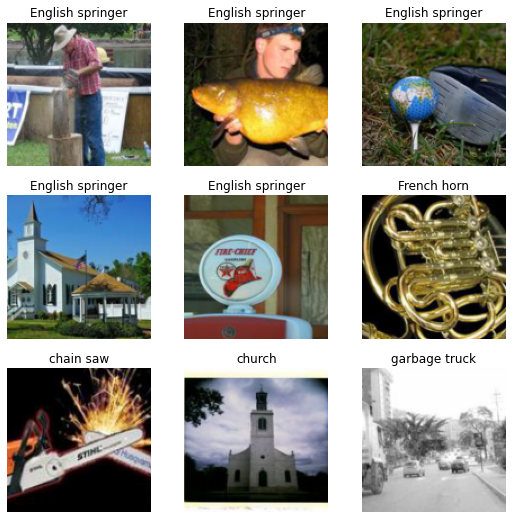

In [18]:
dls = dblock.dataloaders(path)
dls.show_batch()

In [19]:
imagenette = DataBlock(blocks = (ImageBlock, CategoryBlock),
                       get_items = get_image_files,
                       get_y = Pipeline([parent_label, lbl_dict.__getitem__]),
                       splitter = GrandparentSplitter(valid_name='val'),
                       item_tfms = RandomResizedCrop(128, min_scale=0.35),
                       batch_tfms = Normalize.from_stats(*imagenet_stats))

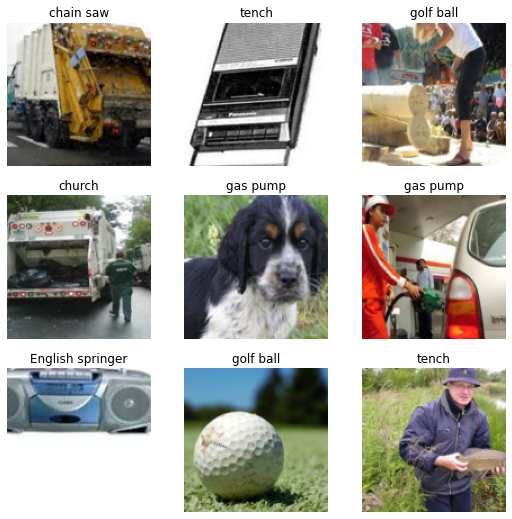

In [20]:
dls = imagenette.dataloaders(path)
dls.show_batch()

In [21]:
source = untar_data(URLs.IMAGENETTE_160)
fnames = get_image_files(source)

A new version of this dataset is available, downloading...


File downloaded is broken. Remove /home/favi/.fastai/archive/imagenette2-160.tgz and try again.


In [22]:
learn = cnn_learner(dls, resnet34, metrics=accuracy, pretrained=False)

In [23]:
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,accuracy,time
0,2.449733,7.229446,0.261911,00:13
1,2.213964,2.124206,0.319745,00:12
2,1.819266,1.687783,0.443567,00:12
3,1.754322,1.509066,0.489682,00:12
4,1.472726,1.301952,0.592866,00:12


In [24]:
learn = Learner(dls, xresnet34(n_out=10), metrics=accuracy)

SuggestedLRs(lr_min=0.0019054606556892395, lr_steep=0.001737800776027143)

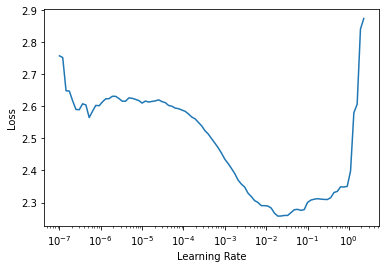

In [25]:
learn.lr_find()

In [26]:
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.620601,1.477183,0.526879,00:12
1,1.184863,1.074054,0.660127,00:12
2,0.955175,0.995807,0.683312,00:12
3,0.797473,0.753498,0.762548,00:12
4,0.677407,0.707098,0.773758,00:12


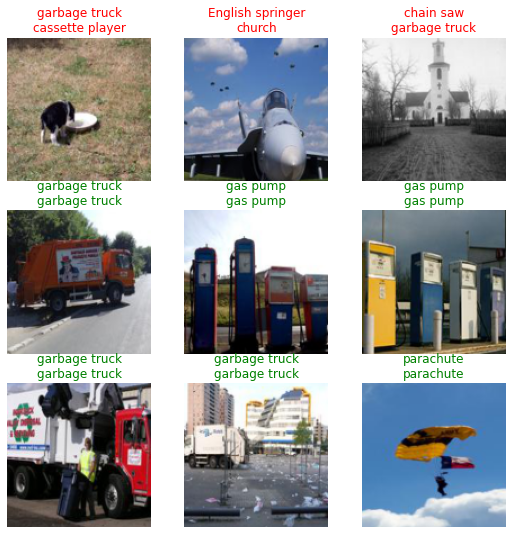

In [27]:
learn.show_results()